In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import precision_recall_curve,roc_curve,average_precision_score,auc
from sklearn.metrics._classification import log_loss

In [4]:
# import dataset
heart = pd.read_csv('./heart.csv')
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


age - 年龄
sex - (1 = male(男性); 0 = (女性))
cp - chest pain type(胸部疼痛类型)（1：典型的心绞痛-typical，2：非典型心绞痛-atypical，3：没有心绞痛-non-anginal，4：无症状-asymptomatic）
trtbps - 静息血压 (in mm Hg on admission to the hospital)
chol - 胆固醇 in mg/dl
fbs - (空腹血糖 > 120 mg/dl) (1 = true; 0 = false)
restecg - 静息心电图测量（0：普通，1：ST-T波异常，2：可能左心室肥大）
thalachh - 最高心跳率
exng - 运动诱发心绞痛 (1 = yes; 0 = no)
oldpeak - 运动相对于休息引起的ST抑制
slp - 运动ST段的峰值斜率（1：上坡-upsloping，2：平的-flat，3：下坡-downsloping）
caa - 主要血管数目(0-4)
thall - 一种叫做地中海贫血的血液疾病（3 = normal; 6 = 固定的缺陷-fixed defect; 7 = 可逆的缺陷-reversable defect）
output - 是否患病 (1=yes, 0=no)

<Axes: ylabel='output'>

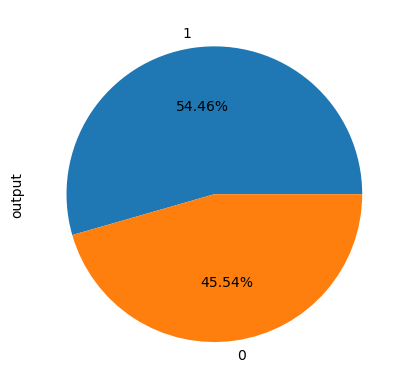

In [7]:
# output visualization
heart.output.value_counts().plot(kind="pie",autopct="%.2f%%")

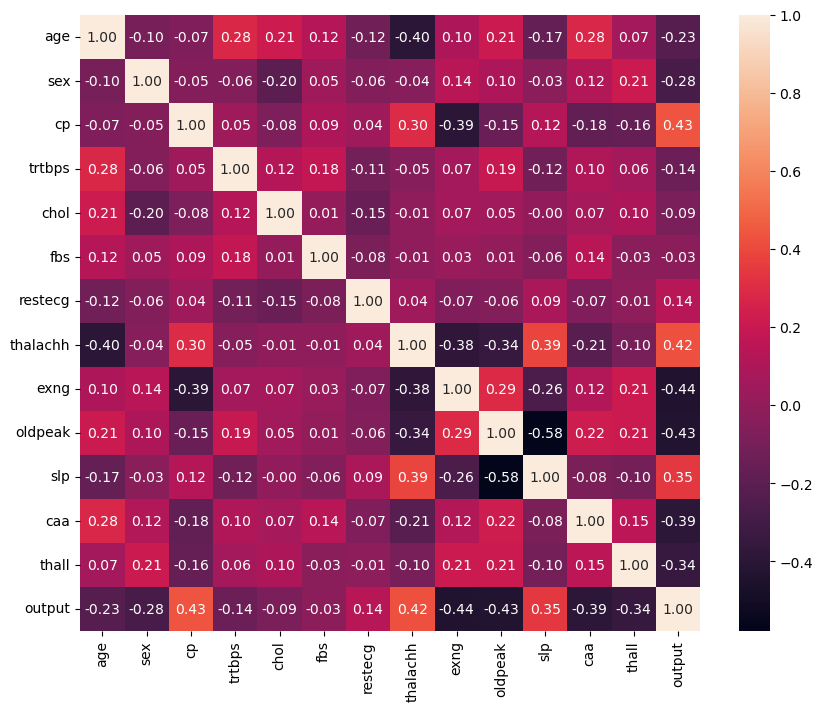

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(heart.corr(), annot=True, fmt='.2f')
plt.show()

exng, cp, oldpeak, thalachh
caa, thall, slp
age, sex
以上三组与output关系较明显，从上到下依次递减

In [9]:
# 数据预处理 & split into train and test
features = heart.drop(columns=['output'])
output = heart['output']

In [10]:
features.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

In [11]:
# sex
features.loc[features['sex']==0,'sex'] = 'female'
features.loc[features['sex']==1,'sex'] = 'male'

# cp
features.loc[features['cp'] == 1,'cp'] = 'typical'
features.loc[features['cp'] == 2,'cp'] = 'atypical'
features.loc[features['cp'] == 3,'cp'] = 'non-anginal'
features.loc[features['cp'] == 4,'cp'] = 'asymptomatic'

# fbs
features.loc[features['fbs'] == 1,'fbs'] = 'true'
features.loc[features['fbs'] == 0,'fbs'] = 'false'

# exng
features.loc[features['exng'] == 1,'exng'] = 'true'
features.loc[features['exng'] == 0,'exng'] = 'false'

# slp
features.loc[features['slp'] == 1,'slp'] = 'up'
features.loc[features['slp'] == 2,'slp'] = 'flat'
features.loc[features['slp'] == 3,'slp'] = 'down'

# thall
features.loc[features['thall'] == 3,'thall'] = 'normal'
features.loc[features['thall'] == 3,'thall'] = 'fixed'
features.loc[features['thall'] == 3,'thall'] = 'reversable'

# restecg
# 0：普通，1：ST-T波异常，2：可能左心室肥大
features.loc[features['restecg'] == 0,'restecg'] = 'normal'
features.loc[features['restecg'] == 1,'restecg'] = 'ST-T abnormal'
features.loc[features['restecg'] == 2,'restecg'] = 'Left ventricular hypertrophy'

# ca
features.caa.astype("object")

# thal
features.thall.astype("object")

features.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,male,non-anginal,145,233,true,normal,150,false,2.3,0,0,1
1,37,male,atypical,130,250,false,ST-T abnormal,187,false,3.5,0,0,2
2,41,female,typical,130,204,false,normal,172,false,1.4,flat,0,2
3,56,male,typical,120,236,false,ST-T abnormal,178,false,0.8,flat,0,2
4,57,female,0,120,354,false,ST-T abnormal,163,true,0.6,flat,0,2


In [12]:
features_temp = StandardScaler().fit_transform(pd.get_dummies(features))

X_train, X_test, y_train, y_test = train_test_split(features_temp, output, test_size=0.2)

In [42]:
# CART algorithm
from six import StringIO
#from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot

np.random.seed(88)
#找不到下载的路径 这个图在我的电脑画不出来 如果已经成功加载过 图会正常出
# import os
# os.environ["PATH"] += os.pathsep + './anaconda3/lib/python3.11/site-packages'

clf = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)

# dot_data = StringIO()
# export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters = True)
# (graph,) = pydot.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('iris.png')

Text(0, 0.5, 'TPR')

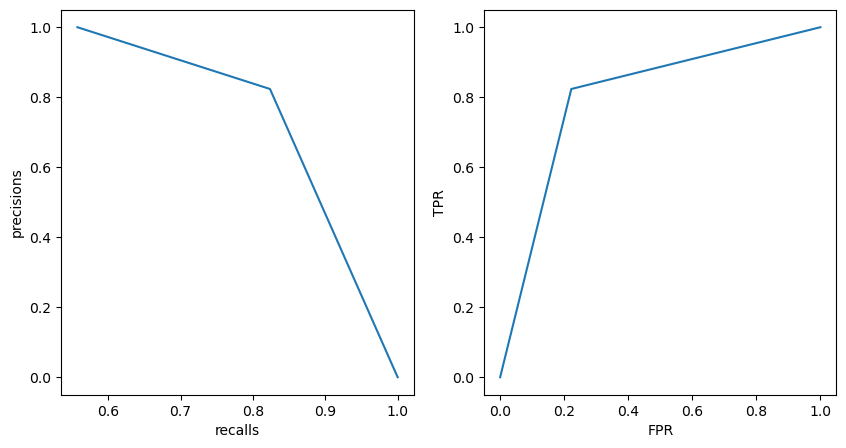

In [43]:
y_pred = clf.predict_proba(X_test)

precisions,recalls,thretholds = precision_recall_curve(y_test, y_pred[:,1])
fpr,tpr,thretholds = roc_curve(y_test, y_pred[:,1])

fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].plot(precisions,recalls)
axes[0].set_xlabel("recalls")
axes[0].set_ylabel("precisions")
axes[1].plot(fpr,tpr)
axes[1].set_xlabel("FPR")
axes[1].set_ylabel("TPR")

In [45]:
print('The average precision score of CART algorithm is: ', round(average_precision_score(y_test, y_pred[:,1]), 3))
print('The AUC of CART algorithm is: ', round(auc(fpr,tpr), 3))

The average precision score of CART algorithm is:  0.777
The AUC of CART algorithm is:  0.801


In [46]:
# Naive Bayes
from sklearn.naive_bayes import BernoulliNB

np.random.seed(99)

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000]
loss_list = []

for i in alpha:
    clf = BernoulliNB(alpha=i).fit(X_train, y_train)

    y_pred = clf.predict_proba(X_test)

    loss = log_loss(y_test, y_pred)
    loss_list.append(loss)
    print(f"For alpha={i}, log Loss:", loss)

For alpha=1e-05, log Loss: 0.4343578402712137
For alpha=0.0001, log Loss: 0.4343571683059478
For alpha=0.001, log Loss: 0.43435044878079204
For alpha=0.1, log Loss: 0.4336127417713357
For alpha=1, log Loss: 0.4270543780599345
For alpha=10, log Loss: 0.3777271312243387
For alpha=100, log Loss: 0.32728115356018267
For alpha=1000, log Loss: 0.5742194468069932


In [47]:
best_alpha = alpha[np.argmin(loss_list)]
clf = BernoulliNB(alpha=i).fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

Text(0, 0.5, 'TPR')

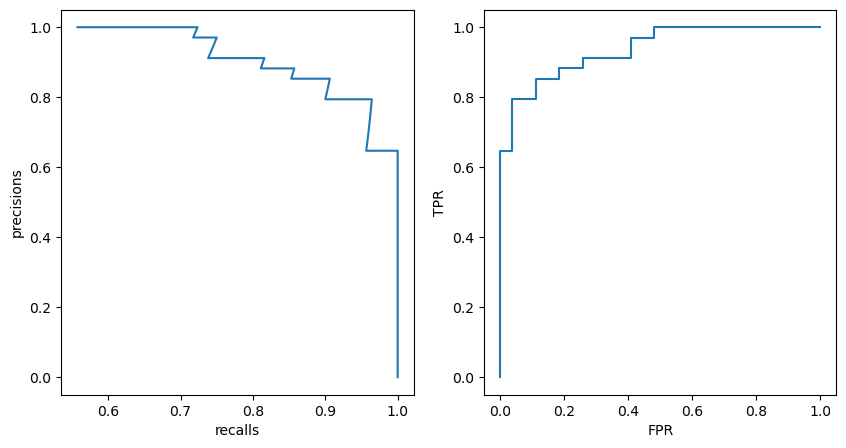

In [48]:
precisions,recalls,thretholds = precision_recall_curve(y_test, y_pred[:,1])
fpr,tpr,thretholds = roc_curve(y_test, y_pred[:,1])

fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].plot(precisions,recalls)
axes[0].set_xlabel("recalls")
axes[0].set_ylabel("precisions")
axes[1].plot(fpr,tpr)
axes[1].set_xlabel("FPR")
axes[1].set_ylabel("TPR")

In [49]:
print('The average precision score of Naive Bayes Model is: ', round(average_precision_score(y_test, y_pred[:,1]), 3))
print('The AUC of Naive Bayes Model is: ', round(auc(fpr,tpr), 3))

The average precision score of Naive Bayes Model is:  0.956
The AUC of Naive Bayes Model is:  0.937


In [50]:
# SVM
from sklearn.svm import SVC

np.random.seed(66)

model1 = SVC(kernel = 'linear', probability=True).fit(X_train, y_train)
model2 = SVC(kernel = 'rbf', probability=True).fit(X_train, y_train)
model3 = SVC(kernel = 'poly', probability=True).fit(X_train, y_train)

y_pred1 = model1.predict_proba(X_test)
y_pred2 = model2.predict_proba(X_test)
y_pred3 = model3.predict_proba(X_test)

print('average precision score:', average_precision_score(y_test, y_pred1[:,1]), '; log_loss:', log_loss(y_test, y_pred1))
print('average precision score:', average_precision_score(y_test, y_pred2[:,1]), '; log_loss:', log_loss(y_test, y_pred2))
print('average precision score:', average_precision_score(y_test, y_pred3[:,1]), '; log_loss:', log_loss(y_test, y_pred3))
#不同的kernel选择区别不大，但综合来说 第二个更好一好，因为log loss稍微小一些

average precision score: 0.9125041988227218 ; log_loss: 0.40683214295987924
average precision score: 0.914218277371928 ; log_loss: 0.4039575620824224
average precision score: 0.9274622827572065 ; log_loss: 0.4094993729703233


Text(0, 0.5, 'TPR')

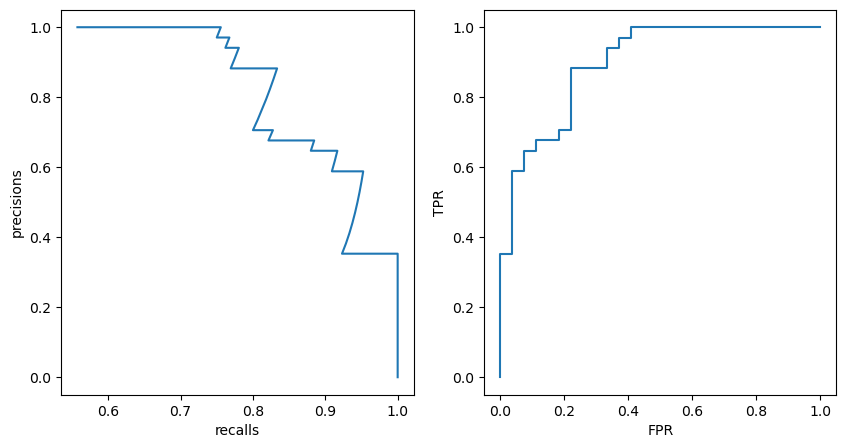

In [51]:
precisions,recalls,thretholds = precision_recall_curve(y_test, y_pred2[:,1])
fpr,tpr,thretholds = roc_curve(y_test, y_pred2[:,1])

fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].plot(precisions,recalls)
axes[0].set_xlabel("recalls")
axes[0].set_ylabel("precisions")
axes[1].plot(fpr,tpr)
axes[1].set_xlabel("FPR")
axes[1].set_ylabel("TPR")

In [53]:
print('The average precision score of SVM is: ', round(average_precision_score(y_test, y_pred2[:,1]), 3))
print('The AUC of SVM is: ', round(auc(fpr,tpr), 3))

The average precision score of SVM is:  0.914
The AUC of SVM is:  0.897


By comparing average precision score and the value of AUC, Naive Bayes Algorithm performs the best among the three models. 